<a href="https://colab.research.google.com/github/jieunkxx/dsci-100-2023w2-group5/blob/main/analysis/project_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Project: Discussion of Risk Factors of Heart Disease

In [ ]:
#import

#library
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


alt.data_transformers.disable_max_rows()
set_config(transform_output="pandas")

1. Introduction




Heart disease describes various conditions that affect the heart, but the data set collected by Detrano et al. is specific to coronary artery disease (CAD). CAD is characterized by Detrano et al. of at least 500% of blood vessels narrow causing impaired blood flow to the heart due to plaque build-up. The plaque consists mostly of cholesterol, within the inner walls of the arteries. The blockage from this plaque inhibits the heart from receiving adequate levels of oxygenated blood. This can cause symptoms such as chest pains and shortness of breath. In severe cases, heart attacks can transpire if the complete blockage of blood flow to the heart occurs (Coronary artery disease, 2022).

Detrano et al. collected 76 attributes of 303 patients at the Clevaland Clinic, but only 14 variables were used in their paper describing the possible applications in diagnosis of CAD. The 14 varaibles, with their abbreivations in brackets, consisted of:

1. age
2. sex
3. the degree of chest pain (cp)
4. resting blood pressure during admission to hospital (trestbps)
5. serum cholesterol (chol)
6. fasting blood sugar over 120mg/dL (fbs)
7. normal or abnormal resting electrocardiographic results (restecg)
8. maximum heart rate achieved (thalach)
9. The presence of exercise induce angina (exang)
10. ST depression induced by exercise compared to resting electrocardiographic results (oldpeak)
11. the slope of the ST segment during an exercise test (slope)
12. number of major vessels (ca)
13. presence of a blood disorder, thalassemia (thal)
14. and diagnosis of heart disease (num) - target variable

Our variables of interest include: sex, chol, trestbps, and num. Since the plaque causing the blockage is mostly cholesterol and can disrupt blood pressure, we're interested in diagnosis of heart disease through the two variables chol and trestbps.

In addition, we're also interested in the question: “Can we use KNN classification be able to detect the presence of coronary artery disease based on the levels of cholesterol levels and resting systolic blood pressure, and whether there are any diagnostic differences in males or females?”.

2. Data Selection and Analysis

This study used a heart disease dataset found in UC Irvine’s online Machine Learning Repository. [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

The data was gathered from “test results of 303 patients undergoing angiography at the Cleveland Clinic in Cleveland, Ohio” (Detrano et. al., 1989) and contains 14 variables, some of which are categorical while others are numerical. Thus, the final dataset is 14 columns by 303 rows.
The dataset is loaded by running the cell below.


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/45/data.csv')

Before we move on to do the modeling analysis, we examined our dataset to understand the problem and the structure of the data.

In [ ]:
df.head().style.set_caption("Table 1. Dataset from UC Irvine’s online Machine Learning Repository")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.300000,3,0.000000,6.000000,0
1,67,1,4,160,286,0,2,108,1,1.500000,2,3.000000,3.000000,2
2,67,1,4,120,229,0,2,129,1,2.600000,2,2.000000,7.000000,1
3,37,1,3,130,250,0,0,187,0,3.500000,3,0.000000,3.000000,0
4,41,0,2,130,204,0,2,172,0,1.400000,1,0.000000,3.000000,0


The first step in our study was cleaning the data. We dropped data columns that were not of interest in this project.

In [ ]:
heart_disease = df[['sex', 'trestbps', 'chol', 'num']]

In [ ]:
heart_disease.describe().style.set_caption("Table 2. Summary of Dataset containing our variables of interest ")

,sex,trestbps,chol,num
count,303.000000,303.000000,303.000000,303.000000
mean,0.679868,131.689769,246.693069,0.937294
std,0.467299,17.599748,51.776918,1.228536
min,0.000000,94.000000,126.000000,0.000000
25%,0.000000,120.000000,211.000000,0.000000
50%,1.000000,130.000000,241.000000,0.000000
75%,1.000000,140.000000,275.000000,2.000000
max,1.000000,200.000000,564.000000,4.000000


The dataset consists of 303 observations. The variables vary in type and range, with cholesterol from 126 to 564 mg/dL, and blood pressure from 94 to 200 mm Hg. The 'Sex' variable is categorical: '1' represents male and '0' for female. The num variable is the target variable for heart disease diagnosis, it is binary variable with a mean close to 1, indicating a balnace between the categories.
Prior to analysis we identified outliers, and transformed the 'trestbps' to 'restingbps', the target variable 'num' to 'disease' and its values 0 to 'N' for 'Not Presented' and 1, 2, 3, 4 to 'Y' for 'Presented' as indicated in the dataset information: [Dataset Information](https://archive.ics.uci.edu/dataset/45/heart+disease#:~:text=Dataset-,Information,-Additional%20Information)

In [ ]:
# Transform sex variable values

heart_disease["sex"]=heart_disease["sex"].replace({
     0:"Female",
     1:"Male",
})

# Transform the target variable num to disease and its values 0 to 'N' for 'Not Presented' and 1, 2, 3 to 'Y' for 'Presented'
heart_disease['num'] = heart_disease['num'].replace({
    0: "N",
    1: "Y",
    2: "Y",
    3: "Y",
    4: "Y"
})

heart_disease = heart_disease.rename(columns={"num": "disease", "trestbps": "restingbps"})

heart_disease.style.set_caption("Table 3. Refined Dataset with Improved Observation Labels")

<ipython-input-38-1a2fffc60804>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease["sex"]=heart_disease["sex"].replace({
<ipython-input-38-1a2fffc60804>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease['num'] = heart_disease['num'].replace({


,sex,restingbps,chol,disease
0,Male,145,233,N
1,Male,160,286,Y
2,Male,120,229,Y
3,Male,130,250,N
4,Female,130,204,N
5,Male,120,236,N
6,Female,140,268,Y
7,Female,120,354,N
8,Male,130,254,Y
9,Male,140,203,Y


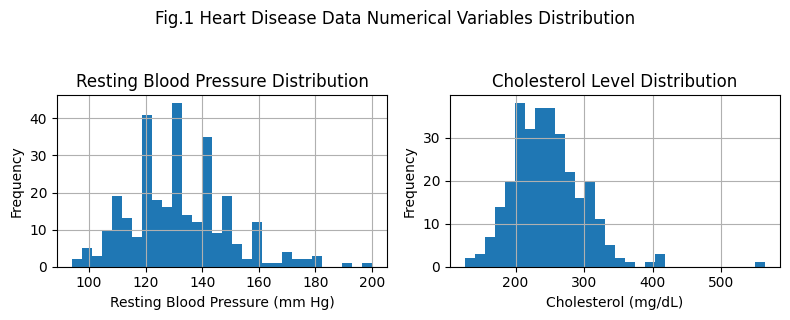

In [ ]:
# Examine numerical variables
num_dist = heart_disease[['restingbps', 'chol']].hist(bins=30, figsize=(8, 3))
num_dist[0, 0].set_title('Resting Blood Pressure Distribution')
num_dist[0, 0].set_xlabel('Resting Blood Pressure (mm Hg)')
num_dist[0, 0].set_ylabel('Frequency')

num_dist[0, 1].set_title('Cholesterol Level Distribution')
num_dist[0, 1].set_xlabel('Cholesterol (mg/dL)')
num_dist[0, 1].set_ylabel('Frequency')

plt.suptitle('Fig.1 Heart Disease Data Numerical Variables Distribution', y=1.05)

plt.tight_layout()
plt.show()

Fig.1 indicates that the two numerical variables "Cholesterol Levels" (chol) and "Resting blood pressure" (trestbps) contains a few outliers, but the majority of the data falls within a reasonable range. The two variable values are on the quitely same scale, but in different units. Thus, we decided to standardize the two variables for a better accuracy.

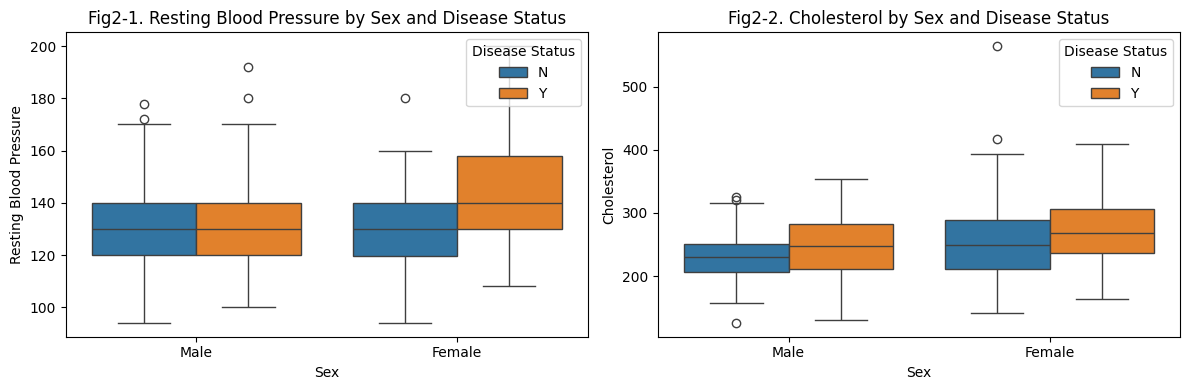

In [ ]:
# Examine the categorical variables for possible relationships

plt.figure(figsize=(12, 4))
# Subplot for 'trestbps'
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='restingbps', hue='disease', data=heart_disease)
plt.title('Fig2-1. Resting Blood Pressure by Sex and Disease Status')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.legend(title='Disease Status', loc='upper right')

# Subplot for 'chol'
plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='chol', hue='disease', data=heart_disease)
plt.title('Fig2-2. Cholesterol by Sex and Disease Status')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.legend(title='Disease Status', loc='upper right')

plt.tight_layout()
plt.show()


Figure 2. suggest that there is a potential association between higher cholesterol and the presence of heart disease in males. For females, those with heart disease may have higher cholesterol levels and higher resting blood pressure.

In [ ]:
# Split the dataset into train and test set

train_df, test_df = train_test_split(heart_disease, test_size=0.2, random_state=123)
train_df.shape

(242, 4)

In [ ]:
# Transformed the data using a preprocessor, standardizing the variable chol and trestbps.
preprocessor = make_column_transformer(
     (StandardScaler(),["restingbps", "chol"]),
     remainder="passthrough",
    verbose_feature_names_out=False,
)
train_scaled = preprocessor.fit_transform(train_df)
test_scaled =  preprocessor.fit_transform(test_df)
train_scaled.style.set_caption("Table 4. Standardized Dataset")

,restingbps,chol,sex,disease
102,-0.205417,1.070704,Female,N
261,0.242934,1.374468,Female,Y
228,-1.214204,-0.770863,Male,Y
288,-0.093329,-0.486085,Male,N
78,-0.093329,-0.030439,Male,N
124,0.355021,0.672014,Male,Y
200,-1.214204,0.140428,Female,N
197,0.355021,-0.201306,Female,N
24,-0.093329,-0.770863,Male,Y
174,0.747327,-0.656952,Male,Y


In [ ]:
# scatter plot with standardized data values
heart_disease_scaled_chart = alt.Chart(train_scaled).mark_point(size=30, opacity=0.5).encode(
    x=alt.X('restingbps', title='Resting Blood Pressure on Admission to Hospital (Standarized)', scale=alt.Scale(zero=False)),
    y=alt.Y('chol', title="Serum Cholesterol (Standardized)", scale=alt.Scale(zero=False)),
    color=alt.Color("disease", title = "presence of heart disease")
).facet('sex').properties(title='Fig 3. The relationshp of Serum Cholesterol and Resting Blood Pressure toward Heart disease')

heart_disease_scaled_chart

alt.FacetChart(...)

3. Model analysis

In [ ]:
# Selecting the optimal parameter for KNN from the range of 1 to 20 using cross-validation.
knn = KNeighborsClassifier()

parameter_grid = {"n_neighbors": range(1, 51, 1)}

heart_tune_grid = GridSearchCV(
    estimator = knn,
    param_grid = parameter_grid,
    cv=5
)

In [ ]:
heart_tune_grid.fit(
    train_scaled[["restingbps", "chol"]],
    train_scaled["disease"]
)

accu_grid = pd.DataFrame(heart_tune_grid.cv_results_).rename(columns={"param_n_neighbors": "n_neighbors"})
accu_grid = accu_grid[["n_neighbors", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

accu_grid.head().style.set_caption("Table 5. Top Five Neighbors by Accuracy Rate (Mean Test Score) ")

,n_neighbors,mean_test_score
28,29,0.615731
39,40,0.611735
33,34,0.603486
35,36,0.603486
29,30,0.603401


In [ ]:
accu_plot = alt.Chart(accu_grid).mark_line(point=True).encode(
   x=alt.X("n_neighbors", title="Neighbors"),
    y=alt.Y("mean_test_score", title="Accuracy estimate", scale=alt.Scale(zero=False))
).properties(title="Fig. 4 The Number of Neighbors versus Accuracy Estimate")

accu_plot

alt.Chart(...)

The line plot shows the differences in accuracy estimate between each number of neighbors from 1 to 50.
The table below shows the first five numbers of neighbors with the highest accuracy rate, measured as mean_test_score.

According to the line plot and table above, we will adopt the K with the highest accuracy estimate as neighbors=29. Then, we build the KNN model with the optimal neighbors (n=29) and use the model on the testing set.

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=29)

heart_disease_fit = knn_2.fit(train_scaled[["restingbps", "chol"]],train_scaled["disease"])

test_predict = test_scaled[["restingbps", "chol", "disease", "sex"]].assign(
    predict=knn_2.predict(test_scaled[["restingbps", "chol"]])
)

test_predict.head().style.set_caption("Table 6. KNN Model Predictions on Testing Set with knn=29) ")

,restingbps,chol,disease,sex,predict
11,0.499437,0.986392,N,Female,Y
292,-0.716756,-1.639739,Y,Male,N
269,-0.108660,-1.408640,N,Male,N
268,1.229153,-0.505250,Y,Male,N
94,0.195388,0.104012,N,Female,N


In [ ]:
#Create the confusion matrix for KNN model
heart_disease_matrix = pd.crosstab(
    test_predict["disease"],
    test_predict["predict"]
)

heart_disease_matrix.style.set_caption("Table 7. Confusion Matrix for KNN Model Predictions ")

predict,N,Y
disease,,
N,24,9
Y,22,6


In [ ]:
from sklearn.metrics import recall_score, precision_score

#Create a table to summarize the characteristics, accuracy, precision, and recall, for the KNN model.
accuracy = knn_2.score(test_scaled[["restingbps", "chol"]],test_scaled["disease"])

precision = recall_score(test_predict["disease"],
    test_predict["predict"],
    pos_label="Y"
)

recall = recall_score(test_predict["disease"],
    test_predict["predict"],
    pos_label="Y"
)

perform_eval = pd.DataFrame({"Accuracy":accuracy, "Precision":precision, "Recall":recall}, index=["Number in percentage"])

perform_eval.style.set_caption("Table 8. Performance Metrics for KNN Model Predictions ")

,Accuracy,Precision,Recall
Number in percentage,0.491803,0.214286,0.214286


In [ ]:
#Create graphs to show the differences between the KNN model prediction on heart disease and actual data.

predict_plot = alt.Chart(test_predict).mark_point().encode(
    x=alt.X('restingbps', title='Resting Blood Pressure on Admission to Hospital (Standarized)', scale=alt.Scale(zero=False)),
    y=alt.Y('chol', title="Serum Cholesterol (Standardized)", scale=alt.Scale(zero=False)),
    color=alt.Color("predict", title = "presence of heart disease")
).facet("sex", title="Fig. 6 KNN Predicted Relationship between Serum Cholesterol and Resting Blood Pressure, separated by sex ")

original_plot = alt.Chart(test_predict).mark_point().encode(
    x=alt.X('restingbps', title='Resting Blood Pressure on Admission to Hospital (Standarized)', scale=alt.Scale(zero=False)),
    y=alt.Y('chol', title="Serum Cholesterol (Standardized)", scale=alt.Scale(zero=False)),
    color=alt.Color("disease", title = "presence of heart disease")
).facet("sex", title = "Fig. 5 Actual Relationship between Serum Cholesterol and Resting Blood Pressure in Patients, separated by sex ")

display(original_plot)

alt.FacetChart(...)

In [ ]:
display(predict_plot)

alt.FacetChart(...)

4. Discussion

Summary of Findings:
In Fig 6., we see that our KNN model does not accurately predict the presence of heart disease in either females or males. In females, there seems to be an increase in false positives in comparison to patients' diagnoses. In males, there seems to be a higher number of false negatives in comparison to the actual diagnoses of patients. Although our model wasn't very accurate, we believe that the model would be better-fit for females than males as in this scenario of diagnosing the presence of heart disease, a false positive would be safer than a false negative in terms of a heart disease diagnosis.



Expected Results:
For our prediction question, we hypothesized that KNN-model should diagnose females better due to a better positive relationship between serum cholesterol and resting blood pressure as seen in Fig 2. However, we must still consider the unequal distribution of males and females as there is notably more data points for males than females.

So while we did find a difference in the diagnosis between male and female -- the diagnostic results for both sexes using KNN classification were not very accurate. We believe that other variables, such as age would have been useful for our diagnosis. For the sake of trying to build a simple model that would still be accurate, we excluded other variables. But after reviewing our results, we believe that including more variables would have improved our KNN model's performance.

Impact:
There could be further exploration in the under diagnosis of heart disease in males, as exhibited in our KNN classification results.
This could prompt other analysts/researchers to explore alternative analytical/modeling techniques, for a better insight in the relationship between cholesterol levels, blood pressure, heart disease, and sex.


Future Questions:
Possible questions after this project:
* How could we optimize KNN model to better predict heart disease based on serum cholesterol levels and resting blood pressure?
* Could a larger data set offer more insight in using KNN classification for diagnosis of heart disease?
* Could there be a potential under-diagnosis of heart disease in males, if physicians mainly use diagnostic variables that do not exhibit a positive relationship?




5. Reference
References
Coronary artery disease - Symptoms and causes. (2022, May 25). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9
Rahman, A. U., Saeed, M., Mohammed, M. A., Krishnamoorthy, S., Kadry, S., & Eid, F. (2022). An integrated algorithmic MADM approach for heart diseases’ diagnosis based on Neutrosophic Hypersoft set with possibility degree-based setting. Life, 12(5), 729. https://doi.org/10.3390/life12050729References
Coronary artery disease - Symptoms and causes. (2022, May 25). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9
Rahman, A. U., Saeed, M., Mohammed, M. A., Krishnamoorthy, S., Kadry, S., & Eid, F. (2022). An integrated algorithmic MADM approach for heart diseases’ diagnosis based on Neutrosophic Hypersoft set with possibility degree-based setting. Life, 12(5), 729. https://doi.org/10.3390/life12050729
